# Quantitative Analysis of Tech Stocks using TA-Lib and PyNance

This notebook demonstrates technical analysis of multiple tech stocks using historical data from our CSV files.

## Setup and Imports

In [1]:
import sys
sys.path.append('..')  # Add parent directory to Python path

# Import standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import talib
import pynance as pn
from pathlib import Path

# Import our utility classes
from src.utils.financial_analyzer import FinancialAnalyzer

# Set up plotting style
sns.set_theme(style="whitegrid")
sns.set_context("notebook")
sns.set_palette("Set2")

# Optional: Increase default figure size
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100

## Load and Prepare Data

We'll load historical stock data from our CSV files.

In [2]:
# Initialize our analyzer
financial_analyzer = FinancialAnalyzer()

# Function to load stock data from CSV
def load_stock_data(symbol):
    file_path = Path(f'../data/yfinance_data/{symbol}_historical_data.csv')
    df = pd.read_csv(file_path)
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)
    return df

# List of stock symbols
symbols = ['AAPL', 'AMZN', 'GOOG', 'META', 'MSFT', 'NVDA', 'TSLA']

# Load all stock data
stock_data = {}
for symbol in symbols:
    stock_data[symbol] = load_stock_data(symbol)
    print(f"Loaded {len(stock_data[symbol])} days of data for {symbol}")

# Display head of AAPL data as example
stock_data['AAPL'].head()

Loaded 10998 days of data for AAPL
Loaded 6846 days of data for AMZN
Loaded 5020 days of data for GOOG
Loaded 2926 days of data for META
Loaded 9672 days of data for MSFT
Loaded 6421 days of data for NVDA
Loaded 3545 days of data for TSLA


,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
Date,,,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.098943,469033600,0.0,0.0
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093781,175884800,0.0,0.0
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086898,105728000,0.0,0.0
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089049,86441600,0.0,0.0
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091630,73449600,0.0,0.0


## Technical Analysis for Multiple Stocks

Let's analyze technical indicators for all stocks.


Analyzing AAPL...


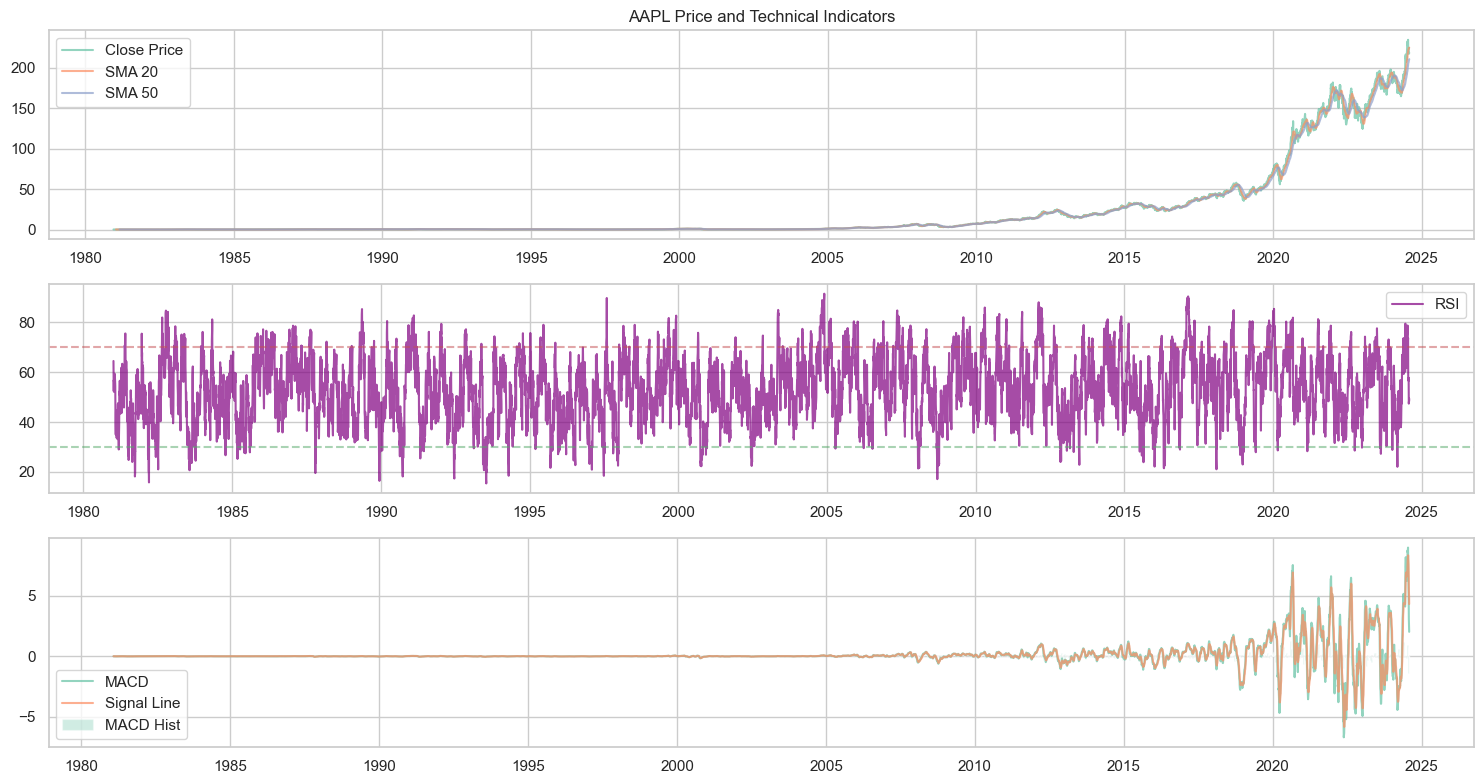


Risk Metrics:
Daily_Volatility: 0.0279
Annualized_Volatility: 0.4428
Sharpe_Ratio: 0.6104
Max_Drawdown: -0.8222

Analyzing AMZN...


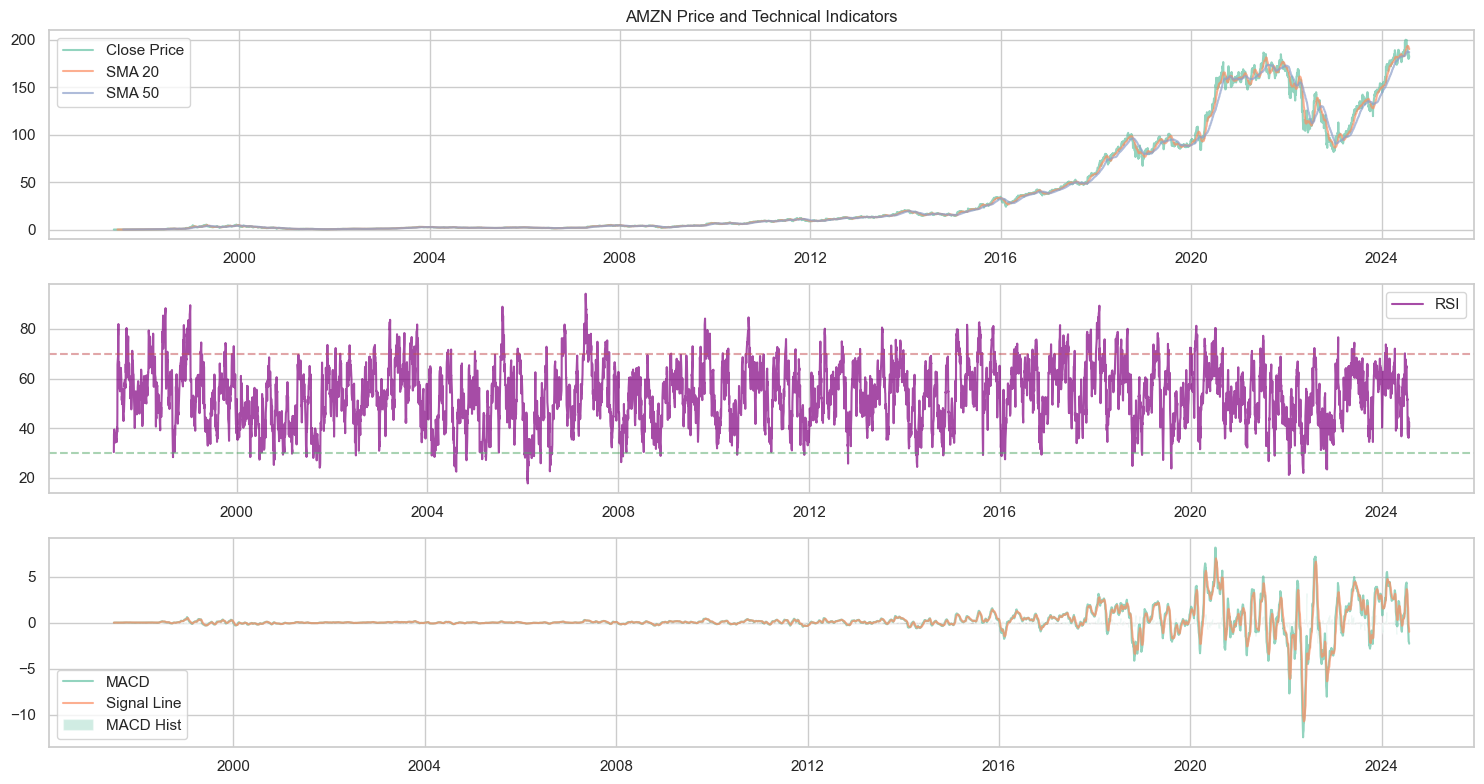


Risk Metrics:
Daily_Volatility: 0.0354
Annualized_Volatility: 0.5624
Sharpe_Ratio: 0.7688
Max_Drawdown: -0.9440

Analyzing GOOG...


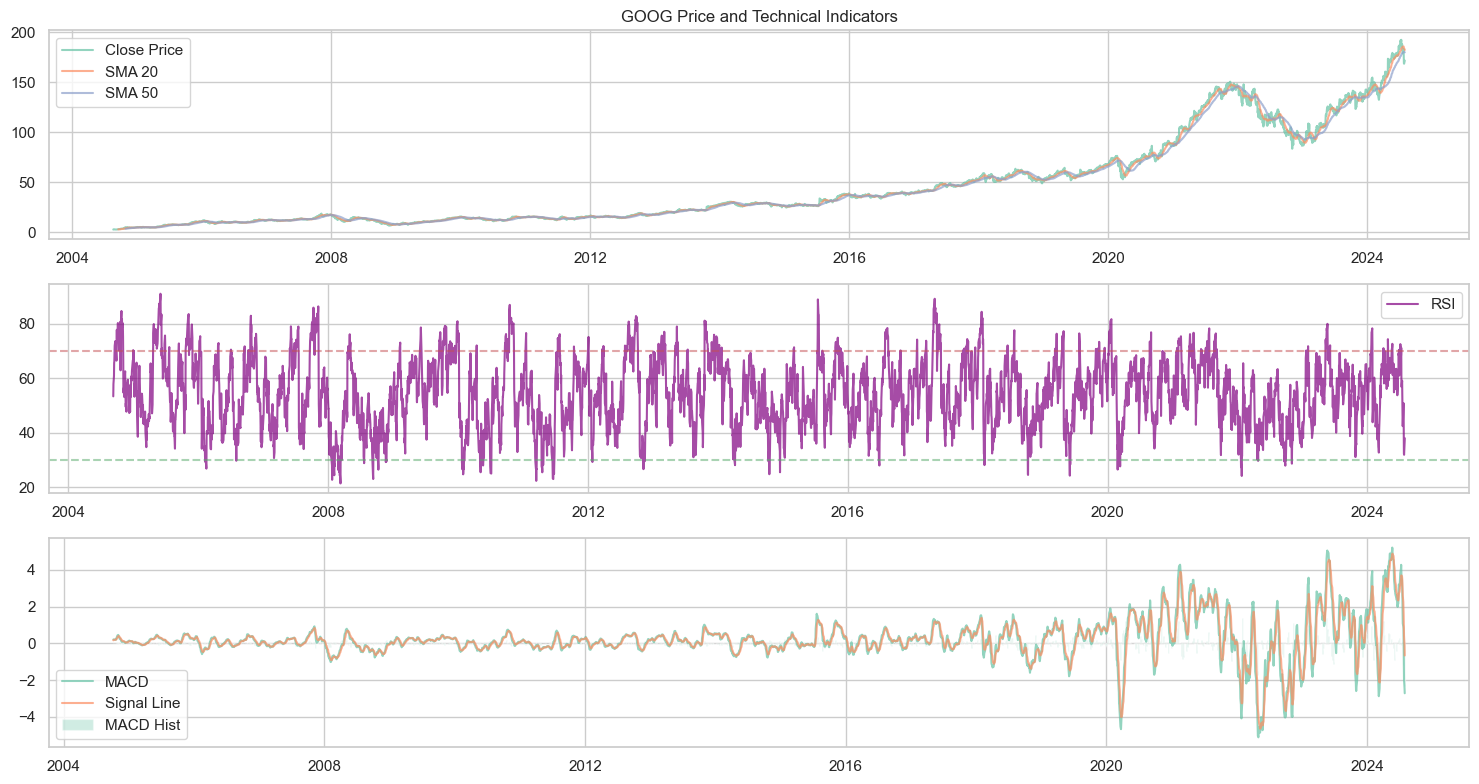


Risk Metrics:
Daily_Volatility: 0.0193
Annualized_Volatility: 0.3067
Sharpe_Ratio: 0.8452
Max_Drawdown: -0.6529

Analyzing META...


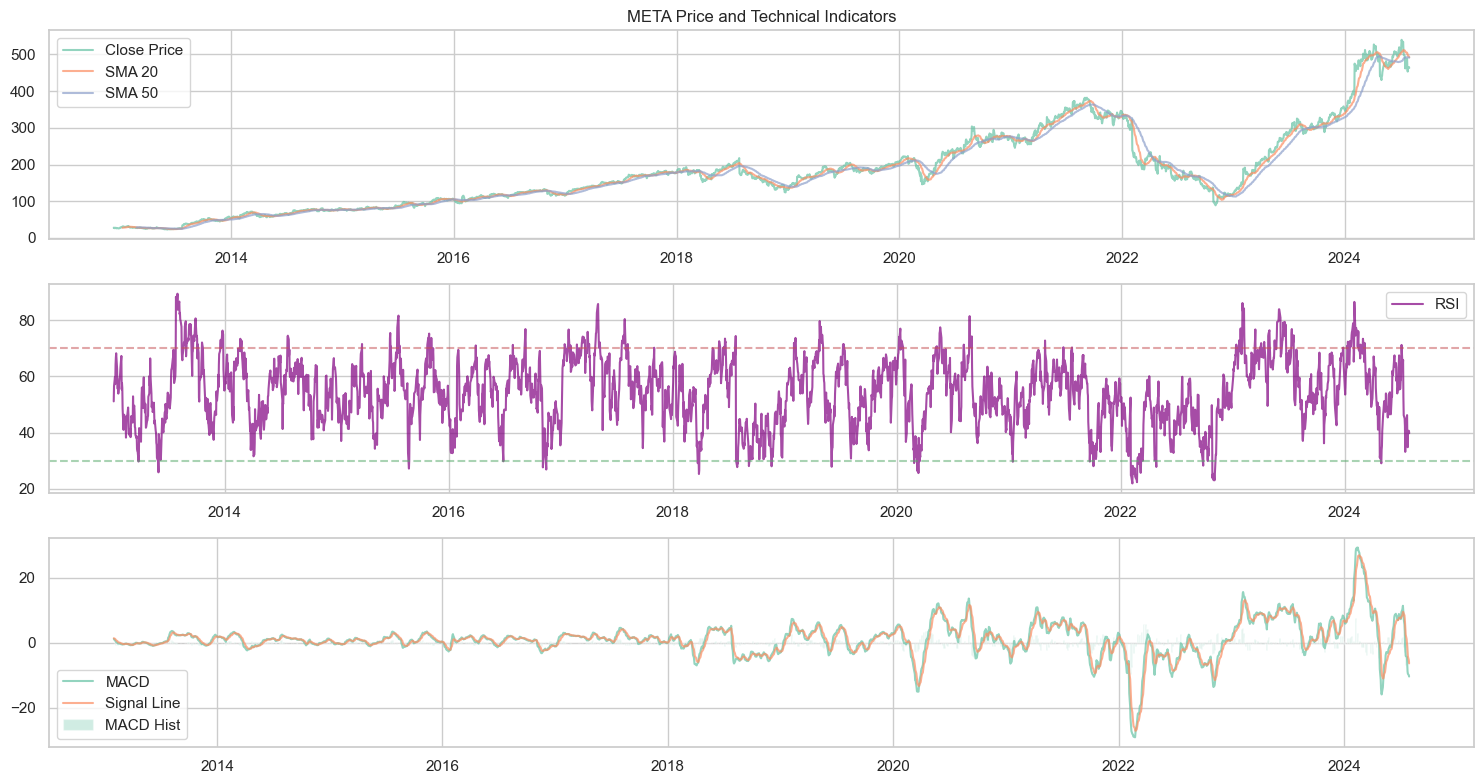


Risk Metrics:
Daily_Volatility: 0.0243
Annualized_Volatility: 0.3854
Sharpe_Ratio: 0.8237
Max_Drawdown: -0.7674

Analyzing MSFT...


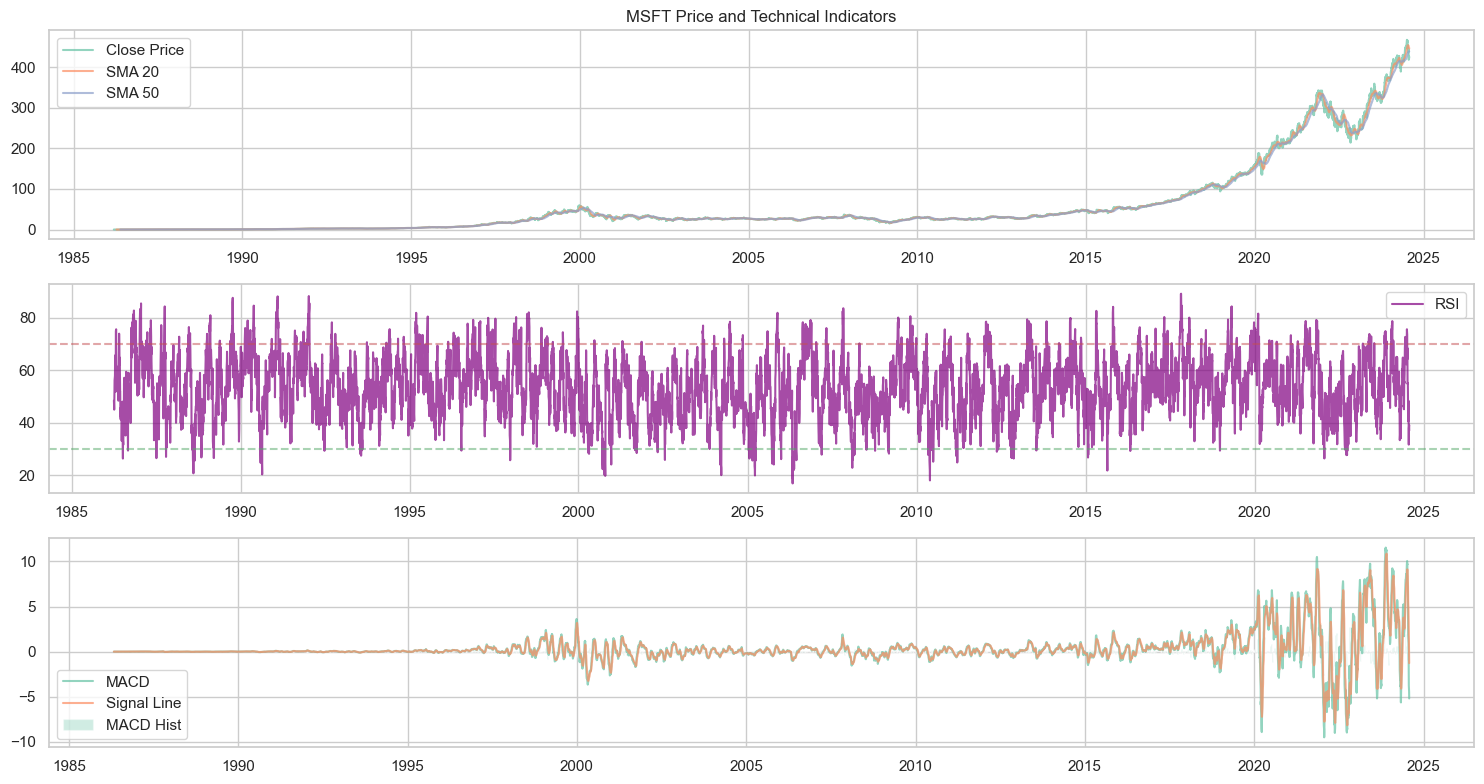


Risk Metrics:
Daily_Volatility: 0.0211
Annualized_Volatility: 0.3354
Sharpe_Ratio: 0.8195
Max_Drawdown: -0.7456

Analyzing NVDA...


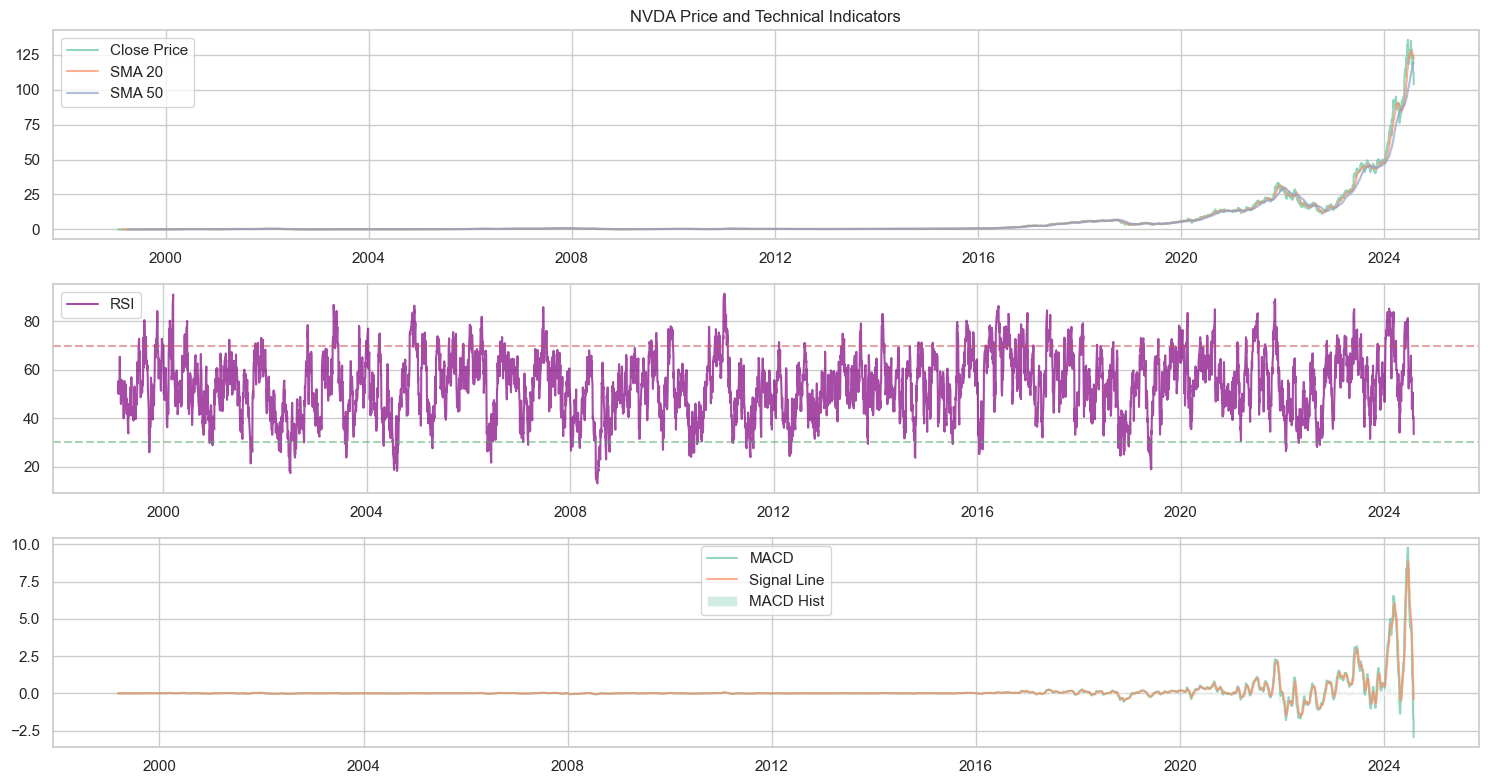


Risk Metrics:
Daily_Volatility: 0.0379
Annualized_Volatility: 0.6011
Sharpe_Ratio: 0.8102
Max_Drawdown: -0.8972

Analyzing TSLA...


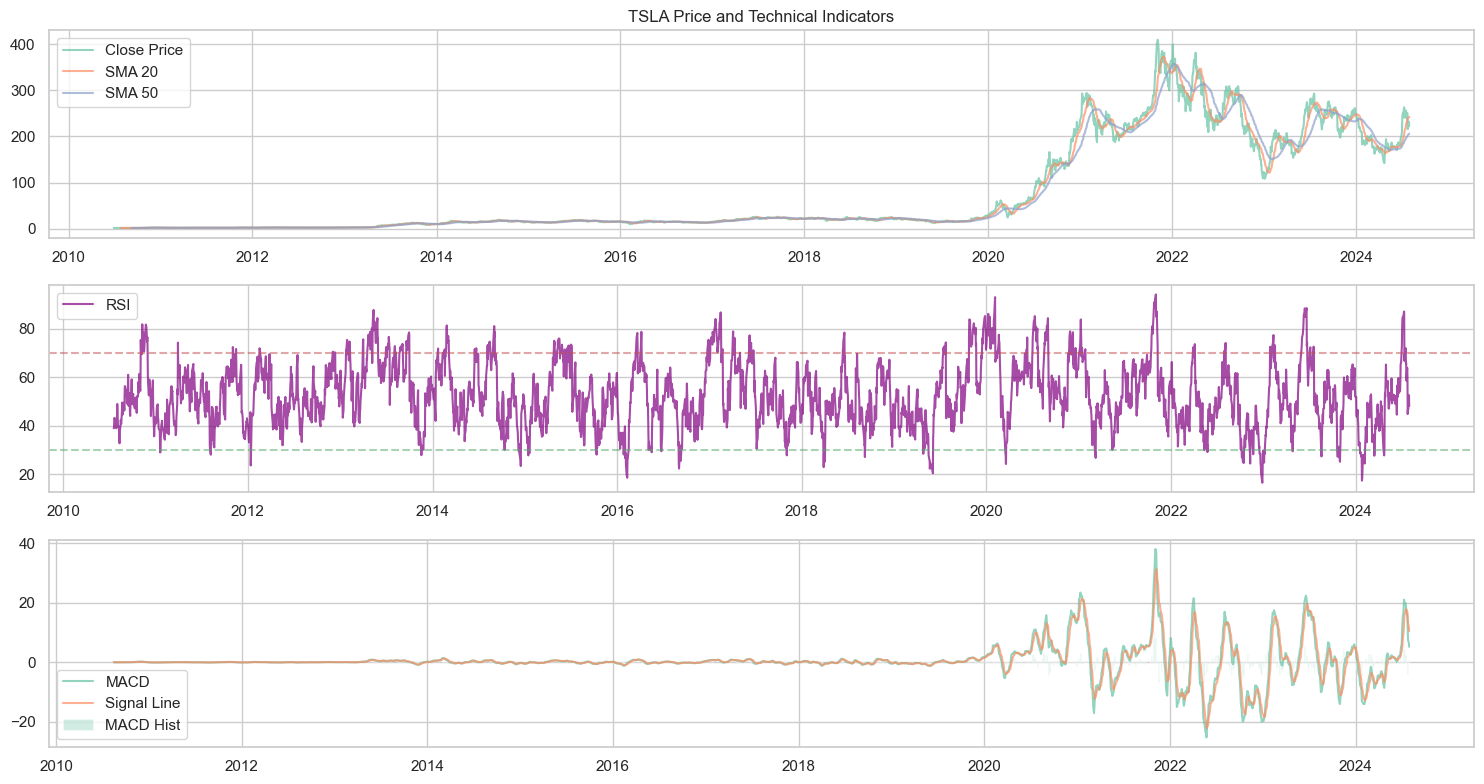


Risk Metrics:
Daily_Volatility: 0.0359
Annualized_Volatility: 0.5694
Sharpe_Ratio: 0.9005
Max_Drawdown: -0.7363


In [3]:
# Function to analyze and plot indicators for a stock
def analyze_stock(symbol, df):
    print(f"\nAnalyzing {symbol}...")
    
    # Calculate indicators
    indicators = financial_analyzer.calculate_technical_indicators(df)
    
    # Plot price and moving averages
    plt.figure(figsize=(15, 8))
    plt.subplot(3, 1, 1)
    plt.plot(df.index, df['Close'], label='Close Price', alpha=0.7)
    plt.plot(df.index, indicators['SMA_20'], label='SMA 20', alpha=0.7)
    plt.plot(df.index, indicators['SMA_50'], label='SMA 50', alpha=0.7)
    plt.title(f'{symbol} Price and Technical Indicators')
    plt.legend()
    
    # Plot RSI
    plt.subplot(3, 1, 2)
    plt.plot(df.index, indicators['RSI'], label='RSI', color='purple', alpha=0.7)
    plt.axhline(y=70, color='r', linestyle='--', alpha=0.5)
    plt.axhline(y=30, color='g', linestyle='--', alpha=0.5)
    plt.legend()
    
    # Plot MACD
    plt.subplot(3, 1, 3)
    plt.plot(df.index, indicators['MACD'], label='MACD', alpha=0.7)
    plt.plot(df.index, indicators['MACD_Signal'], label='Signal Line', alpha=0.7)
    plt.bar(df.index, indicators['MACD_Hist'], label='MACD Hist', alpha=0.3)
    plt.legend()
    
    plt.tight_layout()
    plt.show()
    
    # Calculate and display risk metrics
    risk_metrics = financial_analyzer.calculate_risk_metrics(df)
    print("\nRisk Metrics:")
    for metric, value in risk_metrics.items():
        print(f"{metric}: {value:.4f}")

# Analyze each stock
for symbol in symbols:
    analyze_stock(symbol, stock_data[symbol])

## Comparative Analysis

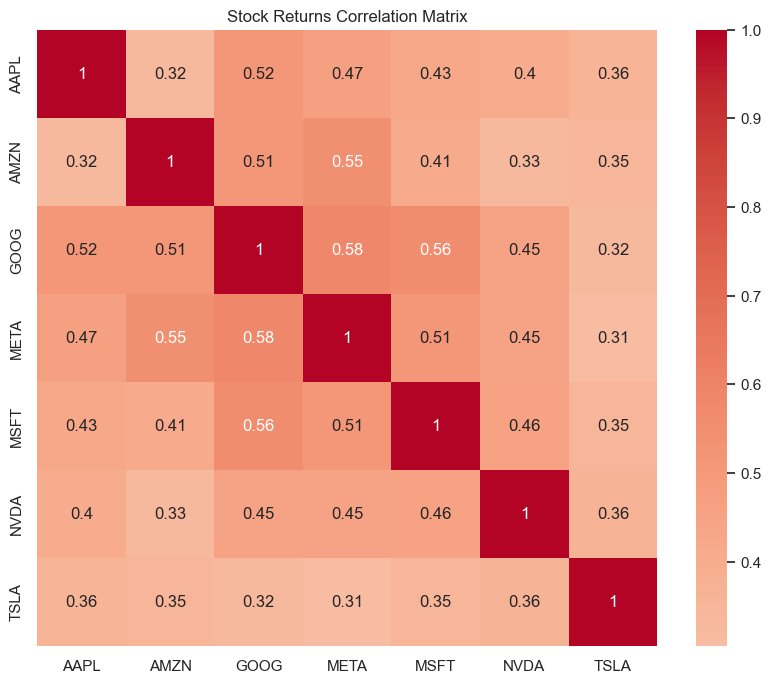


Comparative Metrics:
                         AAPL    AMZN    GOOG    META    MSFT    NVDA    TSLA
Daily_Volatility       0.0279  0.0354  0.0193  0.0243  0.0211  0.0379  0.0359
Annualized_Volatility  0.4428  0.5624  0.3067  0.3854  0.3354  0.6011  0.5694
Sharpe_Ratio           0.6104  0.7688  0.8452  0.8237  0.8195  0.8102  0.9005
Max_Drawdown          -0.8222 -0.9440 -0.6529 -0.7674 -0.7456 -0.8972 -0.7363


In [4]:
# Calculate daily returns for all stocks
returns = pd.DataFrame()
for symbol in symbols:
    returns[symbol] = stock_data[symbol]['Close'].pct_change()

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(returns.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Stock Returns Correlation Matrix')
plt.show()

# Calculate and display comparative metrics
comparative_metrics = pd.DataFrame()
for symbol in symbols:
    metrics = financial_analyzer.calculate_risk_metrics(stock_data[symbol])
    comparative_metrics[symbol] = pd.Series(metrics)

print("\nComparative Metrics:")
print(comparative_metrics.round(4))

## Volatility Analysis

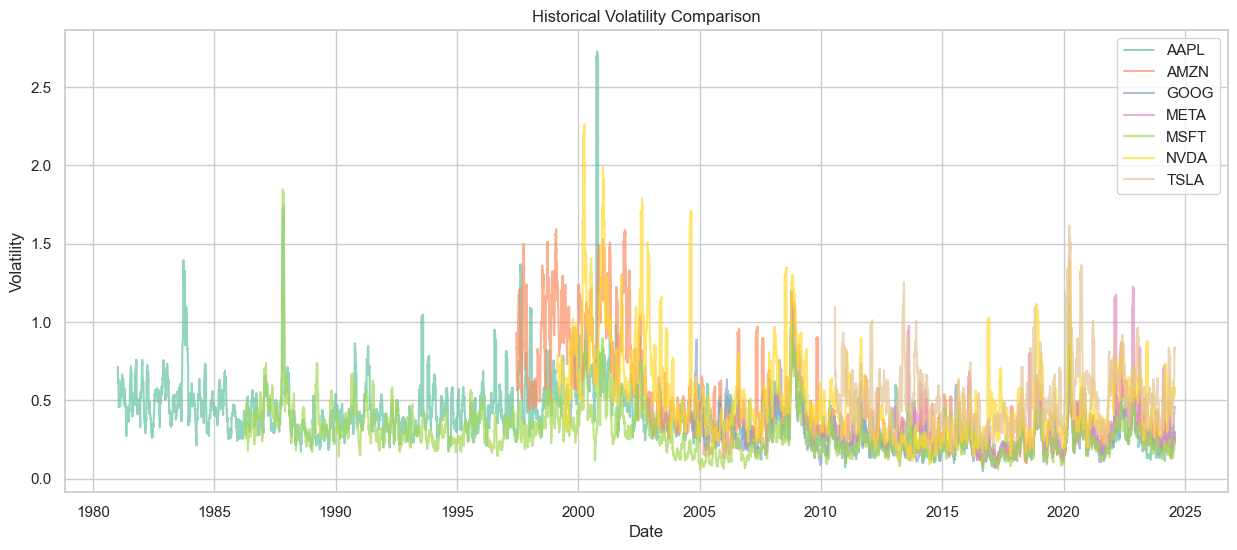


Average Volatility:
AAPL    0.3959
AMZN    0.4638
GOOG    0.2741
META    0.3403
MSFT    0.2991
NVDA    0.5211
TSLA    0.5216
dtype: float64


In [5]:
# Calculate and plot volatility for all stocks
volatilities = pd.DataFrame()
for symbol in symbols:
    volatilities[symbol] = financial_analyzer.calculate_volatility(stock_data[symbol])

plt.figure(figsize=(15, 6))
for symbol in symbols:
    plt.plot(volatilities.index, volatilities[symbol], label=symbol, alpha=0.7)
plt.title('Historical Volatility Comparison')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.show()

# Display average volatility for each stock
print("\nAverage Volatility:")
print(volatilities.mean().round(4))